# Assignment 1 - Evolutionary Computation

## Imports

In [1]:
import numpy as np
from tabulate import tabulate
import random
import matplotlib.pyplot as plt

## Load Data

In [2]:
tsp_problem = np.loadtxt("file-tsp.txt")

## Exercise 1 - Schemata

#### Answer

In [3]:
print("First Schema: ",(1-0.01)**4)
print("Second Schema: ",(1-0.1)**6)


First Schema:  0.96059601
Second Schema:  0.531441


## Exercise 2 - Building Block Hypothesis

#### Answer
threshold breintje


## Exercise 3 - Selection Pressure

In [4]:
def fitness1(x):
    return x**2

def fitness2(x):
    return x+20

In [5]:
f1 = fitness1(2)
f2 = fitness1(3)
f3 = fitness1(4)
total = f1+f2+f3
table_data = [[2,f1, f1/total],
             [3,f2, f2/total],
             [4,f3, f3/total]]
print(tabulate(table_data, headers= ["x", "fitness", "chance"], tablefmt="grid"))

+-----+-----------+----------+
|   x |   fitness |   chance |
+=====+===========+==========+
|   2 |         4 | 0.137931 |
+-----+-----------+----------+
|   3 |         9 | 0.310345 |
+-----+-----------+----------+
|   4 |        16 | 0.551724 |
+-----+-----------+----------+


In [6]:
f1 = fitness2(2)
f2 = fitness2(3)
f3 = fitness2(4)
total = f1+f2+f3
table_data = [[2,f1, f1/total],
             [3,f2, f2/total],
             [4,f3, f3/total]]
print(tabulate(table_data, headers= ["x", "fitness", "chance"], tablefmt="grid"))

+-----+-----------+----------+
|   x |   fitness |   chance |
+=====+===========+==========+
|   2 |        22 | 0.318841 |
+-----+-----------+----------+
|   3 |        23 | 0.333333 |
+-----+-----------+----------+
|   4 |        24 | 0.347826 |
+-----+-----------+----------+


#### Answer

## Exercise 4 - Role of Selection in GA's

#### Answer

## Exercise 5 - Evolutionary Strategies vs. Local Search

#### Answer
a. The search space is explored more because every 1 parent generates 5 offspring of which the best is retained. This means more different options are seen and evaluated.

b. A (1+labda) ES strategy would behave similar to greedy algorithms as it also only performs locally optimal steps. The influence of the value of lambda is seen in how locally the steps are made. A large lamda would mean that the local search space is larger while a small lamda leads to a smaller local search space.

## Exercise 6 - Mementic Algorithms vs Simple EAs

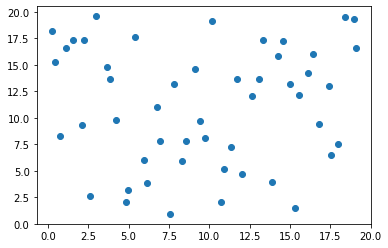

[[ 0.2554 18.2366]
 [ 0.4339 15.2476]
 [ 0.7377  8.3137]]
50


In [7]:
plt.scatter(tsp_problem[:,0],tsp_problem[:,1])
plt.show()
print(tsp_problem[:3])
print(len(tsp_problem))

In [8]:
def initialise_population(n_individuals, individual_len):
    population = np.zeros((n_individuals, individual_len))
    
    for i in range(n_individuals):
        x = np.arange(individual_len)
        random.shuffle(x)
        population[i,:] = x
        
    return population.astype(int)


population = initialise_population(3,len(tsp_problem))
print(population)

[[12 10  9 16 46 22 31 34 39 14  3  8 27 32 43  1 45  6 19 13 18 11 48 38
  17 29 25 35 36  2 15 26 24 30 23 33  5 28 47 40 49  7 44 37  0  4 41 42
  20 21]
 [26 15 48  4 16 32 22 46  0 38 44  7 30 11 17 49  1 40 25  2 28  3 43  9
  12 29 41 37 19 35 34 21 31 47  6 14 18 10 39 23 45 36 24 33  5 42 27 13
   8 20]
 [33 32 24 39 35 19 44  8 31 14 15 23 34 18  3 46 48  1 10 26 40 13 25  6
   0 20 27 22 12 11  9  2 49 28 45 38  4  7 17 16 21 36 43 47 29 37  5 30
  41 42]]


In [9]:
def get_distance(individual):
    distance = 0
    for i in range(individual.size-1):
        x = tsp_problem[individual[i],0] - tsp_problem[individual[i+1],0]
        y = tsp_problem[individual[i],1] - tsp_problem[individual[i+1],1]
        
        d = np.sqrt((x**2)+(y**2))
        distance += d
        
    return distance
#print(get_distance(population[0]))

In [10]:
def opt_2(individual,i,k):
    x = individual[i]
    y = individual[k]
    
    individual[i]=y
    individual[k]=x
    
    return individual

In [11]:
def local_search(individual):
    best_individual = individual
    best_distance = get_distance(best_individual)
    converged = False
    
    while(converged != True):
        improvement = False
        
        for i in range(len(best_individual)-1):
            new_individual = opt_2(best_individual,i,i+1)
            new_distance = get_distance(new_individual)
            
            if new_distance<best_distance:
                best_individual = new_individual
                best_distance = new_distance
                improvement = True
                
        if improvement == False:
            converged = True
            
    return best_individual.astype(int)

print(local_search(population[0]))

[ 9 16 46 22 31 34 39 14  3  8 27 32 43  1 45  6 19 13 18 11 48 38 17 29
 25 35 36  2 15 26 24 30 23 33  5 28 47 40 49  7 44 37  0  4 41 42 20 21
 12 10]


In [12]:
def evaluate(individual):
    return 1/get_distance(individual)

In [13]:
def binary_tournament(population):
    population_index = np.arange(len(population))
#     [option_1, option_2] = random.choices(population_index, 2)
    option_1 = random.choice(population_index)
    option_2 = random.choice(population_index)
    val_1 = evaluate(population[option_1,:])
    val_2 = evaluate(population[option_2,:])
    
    if val_1 > val_2:
        return population[option_1].astype(int)
    else:
        return population[option_2].astype(int)

In [14]:
def crossover(parent_1, parent_2):
    indices = np.arange(len(parent_1))
    pick_1 = random.choice(indices)
    pick_2= random.choice(indices)
    if pick_1>pick_2:
        cut_1 = pick_2
        cut_2 = pick_1
    else:
        cut_1 = pick_1
        cut_2 = pick_2
        
#     print("Crossover points indices:",cut_1,cut_2)
    crossover_part_1 = parent_1[cut_1:cut_2]
    crossover_part_2 = parent_2[cut_1:cut_2]
    
    child_1 = np.zeros(len(parent_1))
    child_2 = np.zeros(len(parent_2))
    
    child_1[cut_1:cut_2] = crossover_part_2
    child_2[cut_1:cut_2] = crossover_part_1
    
    checklist_1 = np.concatenate([parent_1[cut_2:],parent_1[:cut_2]])
    checklist_2 = np.concatenate([parent_2[cut_2:],parent_2[:cut_2]])
    
    checklist_1 = [x for x in checklist_1 if x not in crossover_part_2]
    checklist_2 = [x for x in checklist_2 if x not in crossover_part_1]
    
    
#     print("a child", child_1.astype(int), "with length",len(child_1))
#     print("a crossover piece", crossover_part_2, "with length",len(crossover_part_2))
#     print("a checklist", checklist_1, "with length",len(checklist_1))
    loop_number = len(checklist_1)
    
    for i in range(loop_number):
        child_1[(cut_2+i) % (len(child_1))] = checklist_1[0]
        child_2[(cut_2+i) % (len(child_2))] = checklist_2[0]
        del checklist_1[0]
        del checklist_2[0]
       


    return child_1.astype(int),child_2.astype(int)

# print("eerste papa \n",population[0])
# print("tweede papa \n",population[1])
# kiddo1,kiddo2 = crossover(population[0],population[1])
# print("eerste kiddo \n",kiddo1)
# print("tweede kiddo \n",kiddo2)
# print(len(np.unique(kiddo1)))

In [15]:
def mutate(individual,probability):
    threshold = random.random()
    if threshold<=probability:
        pick_1 = random.choice(individual)
        index_1 = np.where(individual == pick_1)
        pick_2 = random.choice(individual)
        index_2 = np.where(individual == pick_2)
        
        individual[index_1] = pick_2
        individual[index_2] = pick_1
        
        return individual.astype(int)
    else:
        return individual.astype(int)
#print(mutate(kiddo1,0.9))

In [46]:
## Memetic Algorithm

    # Initialise
population_size = 20
n_offspring = 20
mutate_prob = 0.005
iterations = 1500

def memetic_algorithm(population_size,n_offspring,mutate_prob,iterations):
    population = initialise_population(population_size,len(tsp_problem))
    fitness = np.zeros(len(population))
    ext_population = np.zeros((population_size+n_offspring,len(tsp_problem)))
    ext_fitness = np.zeros(population_size+n_offspring)
    fitness_array = np.zeros((iterations,3))

    # Local Search
    for i in range(len(population)):
        population[i,:] = local_search(population[i,:])
        # Evaluate
        fitness[i] = evaluate(population[i,:])


    for n in range(iterations):

        parents = np.zeros((n_offspring,len(tsp_problem))).astype(int)
        for i in range(0, n_offspring, 2):
            parents[i] = binary_tournament(population)
            parents[i+1] = binary_tournament(population)

        children = np.zeros((n_offspring,len(tsp_problem))).astype(int)
        for i in range(0, n_offspring, 2):
            children[i],children[i+1] = crossover(parents[i],parents[i+1])


        for i in range(len(children)):
            children[i,:] = mutate(children[i],mutate_prob)

        ext_population =np.concatenate([population, children]).astype(int)

        for i in range(len(children)):
            children[i,:] = local_search(children[i,:])

        population = children
        for i in range(len(population)):
            fitness[i] = evaluate(population[i,:])

        fitness_array[n,0] = np.min(fitness)
        fitness_array[n,1] = np.max(fitness)
        fitness_array[n,2] = np.average(fitness)
        if n%500 == 0:
            print("Iteration:",n)
    return fitness_array
# loop back



Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000


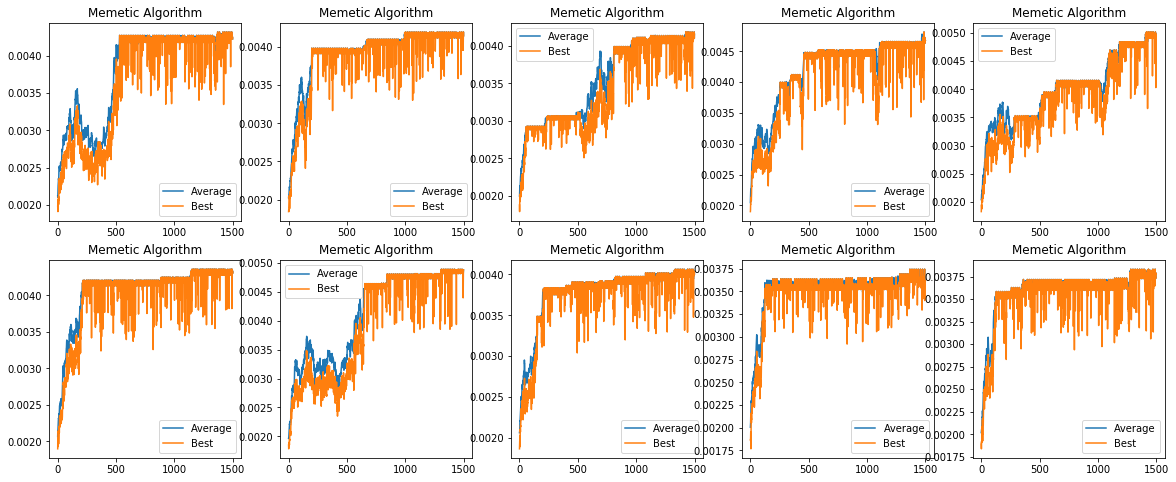

In [47]:
MA_fitness = np.zeros((10,1500,3))
population_size = 20
n_offspring = 20
mutate_prob = 0.005
iterations = 1500

fig, axs = plt.subplots(2,5, figsize=(20,8))
axs = axs.ravel()

for i,ax in enumerate(axs):
    MA_fitness[i,:,:] = memetic_algorithm(population_size,n_offspring,mutate_prob,iterations)
    ax.plot(MA_fitness[i,:,2])
    ax.plot(MA_fitness[i,:,0])
    ax.set_title("Memetic Algorithm")
    ax.legend(["Average","Best"])

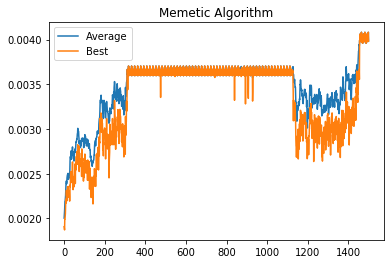

In [32]:
plt.plot(fitness_array[:,2])
plt.plot(fitness_array[:,0])
plt.title("Memetic Algorithm")
plt.legend(["Average","Best"])

In [42]:
## Evolutionary Algorithm

# Initialise
population_size = 20
n_offspring = 20
mutate_prob = 0.01
iterations = 1500

def evolutionary_algorithm(population_size,n_offspring,mutate_prob,iterations):
    population = initialise_population(population_size,len(tsp_problem))
    fitness = np.zeros(len(population))
    ext_population = np.zeros((population_size+n_offspring,len(tsp_problem)))
    ext_fitness = np.zeros(population_size+n_offspring)
    fitness_array_ea = np.zeros((iterations,3))


    # Loop start
    for n in range(iterations):
        parents = np.zeros((n_offspring,len(tsp_problem))).astype(int)
        for i in range(0, n_offspring, 2):
            parents[i] = binary_tournament(population)
            parents[i+1] = binary_tournament(population)

        children = np.zeros((n_offspring,len(tsp_problem))).astype(int)
        for i in range(0, n_offspring, 2):
            children[i],children[i+1] = crossover(parents[i],parents[i+1])

        # Mutate
        for i in range(len(children)):
            children[i,:] = mutate(children[i],mutate_prob)

        ext_population =np.concatenate([population, children]).astype(int)

        population = children
        for i in range(len(population)):
            fitness[i] = evaluate(population[i,:])

        fitness_array_ea[n,0] = np.min(fitness)
        fitness_array_ea[n,1] = np.max(fitness)
        fitness_array_ea[n,2] = np.average(fitness)
        if n%500 == 0:
            print("Iteration:",n)
    return fitness_array_ea
# loop back


Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000
Iteration: 0
Iteration: 500
Iteration: 1000


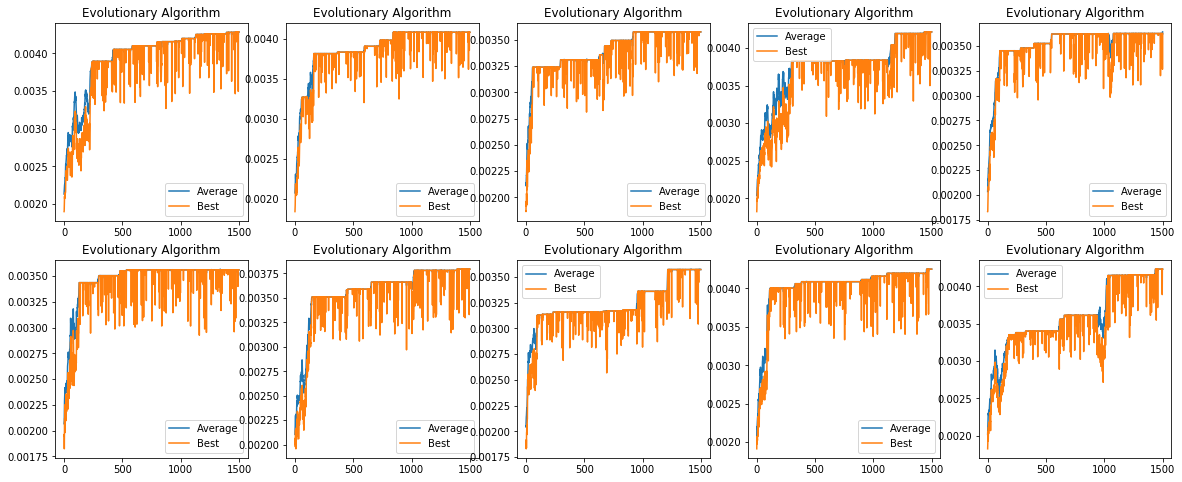

In [45]:
EA_fitness = np.zeros((10,1500,3))
population_size = 20
n_offspring = 20
mutate_prob = 0.005
iterations = 1500

fig, axs = plt.subplots(2,5, figsize=(20,8))
axs = axs.ravel()

for i,ax in enumerate(axs):
    EA_fitness[i,:,:] = evolutionary_algorithm(population_size,n_offspring,mutate_prob,iterations)
    ax.plot(EA_fitness[i,:,2])
    ax.plot(EA_fitness[i,:,0])
    ax.set_title("Evolutionary Algorithm")
    ax.legend(["Average","Best"])

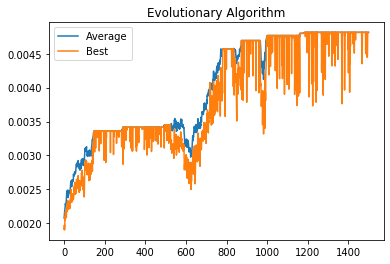

In [36]:
plt.plot(fitness_array_ea[:,2])
plt.plot(fitness_array_ea[:,0])
plt.title("Evolutionary Algorithm")
plt.legend(["Average","Best"])

## Exercise 7 - Genetic Programming Representation

#### Answer

## Exercise 8 - Genetic Programming Behaviour

#### Answer